In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [113]:
start = '2010-01-01'
end = '2022-05-15'

df = yf.download('ttm', start=start, end=end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,17.570000,18.090000,17.490000,18.030001,16.901850,2141700
2010-01-05,17.780001,17.900000,17.620001,17.850000,16.733110,2022500
2010-01-06,17.900000,18.010000,17.770000,17.990000,16.864355,2057800
2010-01-07,17.389999,17.629999,17.340000,17.570000,16.470633,2706800
2010-01-08,17.559999,17.559999,17.370001,17.400000,16.311270,1967200


In [114]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,17.570000,18.090000,17.490000,18.030001,16.901850,2141700
1,2010-01-05,17.780001,17.900000,17.620001,17.850000,16.733110,2022500
2,2010-01-06,17.900000,18.010000,17.770000,17.990000,16.864355,2057800
3,2010-01-07,17.389999,17.629999,17.340000,17.570000,16.470633,2706800
4,2010-01-08,17.559999,17.559999,17.370001,17.400000,16.311270,1967200


In [115]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,17.570000,18.090000,17.490000,18.030001,2141700
1,17.780001,17.900000,17.620001,17.850000,2022500
2,17.900000,18.010000,17.770000,17.990000,2057800
3,17.389999,17.629999,17.340000,17.570000,2706800
4,17.559999,17.559999,17.370001,17.400000,1967200


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3113 entries, 0 to 3112
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3113 non-null   float64
 1   High    3113 non-null   float64
 2   Low     3113 non-null   float64
 3   Close   3113 non-null   float64
 4   Volume  3113 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 121.7 KB


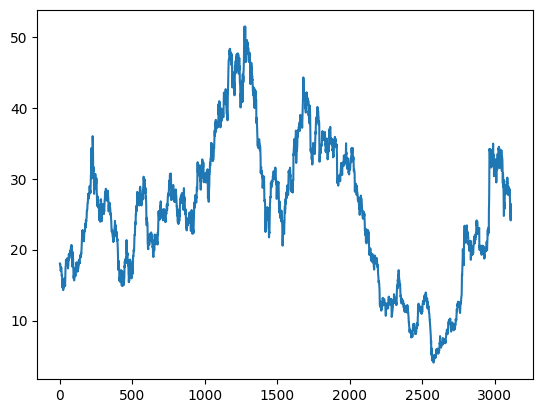

In [117]:
plt.plot(df.Close)

In [118]:
ma100 = df.Close.rolling(100).mean()
ma100

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
3108    30.2612
3109    30.1943
3110    30.1226
3111    30.0607
3112    30.0299
Name: Close, Length: 3113, dtype: float64

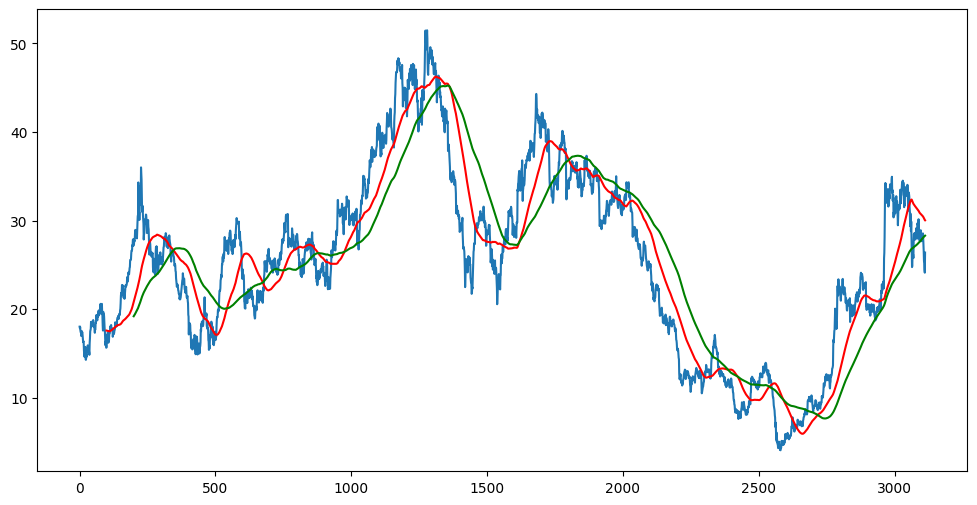

In [119]:
ma200 = df.Close.rolling(200).mean()

plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

### Spliting Data into Trianing and Testing

In [120]:
data_training = pd.DataFrame(df['Close'][0: int(len(df) * 0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df) * 0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2179, 1)
(934, 1)


In [121]:
# convert into the 0 and 1 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [122]:
data_training_array = scaler.fit_transform(data_training)
data_training_array.shape

(2179, 1)

In [123]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

In [124]:
# convert into the numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [125]:
x_train

array([[[0.10083358],
        [0.09599356],
        [0.099758  ],
        ...,
        [0.05700457],
        [0.03683786],
        [0.03764454]],

       [[0.09599356],
        [0.099758  ],
        [0.08846464],
        ...,
        [0.03683786],
        [0.03764454],
        [0.07448237]],

       [[0.099758  ],
        [0.08846464],
        [0.08389351],
        ...,
        [0.03764454],
        [0.07448237],
        [0.06453349]],

       ...,

       [[0.35278299],
        [0.35869859],
        [0.35116967],
        ...,
        [0.13121807],
        [0.12557141],
        [0.10486691]],

       [[0.35869859],
        [0.35116967],
        [0.34848076],
        ...,
        [0.12557141],
        [0.10486691],
        [0.10943803]],

       [[0.35116967],
        [0.34848076],
        [0.34740523],
        ...,
        [0.10486691],
        [0.10943803],
        [0.11804249]]])

# Model 

In [126]:

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [127]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences= True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu', return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(units=170, activation='relu'))
model.add(Dropout(0.6))

model.add(Dense(units= 1))

In [128]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_15 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_16 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_16 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_17 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_17 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_18 (LSTM)              (None, 100, 120)         

In [129]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
65/65 [==============================] - 21s 241ms/step - loss: 0.0403
Epoch 2/10
65/65 [==============================] - 15s 231ms/step - loss: 0.0134
Epoch 3/10
65/65 [==============================] - 15s 234ms/step - loss: 0.0119
Epoch 4/10
65/65 [==============================] - 15s 224ms/step - loss: 0.0089
Epoch 5/10
65/65 [==============================] - 16s 246ms/step - loss: 0.0085
Epoch 6/10
65/65 [==============================] - 15s 234ms/step - loss: 0.0091
Epoch 7/10
65/65 [==============================] - 15s 225ms/step - loss: 0.0081
Epoch 8/10
65/65 [==============================] - 15s 238ms/step - loss: 0.0086
Epoch 9/10
65/65 [==============================] - 14s 216ms/step - loss: 0.0067
Epoch 10/10
65/65 [==============================] - 15s 231ms/step - loss: 0.0068


In [130]:
model.save('keras_model.h5')

In [131]:
past_100_days = data_training.tail(100)

In [132]:
final_df = past_100_days.append(data_testing, ignore_index=True)

C:\Users\KALP\AppData\Local\Temp\ipykernel_12540\531349220.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [133]:
final_df.head()


,Close
0,27.240000
1,27.200001
2,27.190001
3,27.170000
4,26.719999


In [134]:
final_df.tail()

,Close
1029,25.410000
1030,25.459999
1031,24.459999
1032,24.120001
1033,26.389999


In [135]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.75048609],
       [0.74918995],
       [0.7488659 ],
       ...,
       [0.66040182],
       [0.64938437],
       [0.72294233]])

In [136]:
input_data.shape

(1034, 1)

In [137]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [138]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)


(934, 100, 1)


In [139]:

print(y_test.shape)

(934,)


In [140]:
# Making Predictions
y_predicted = model.predict(x_test)
y_predicted.shape

30/30 [==============================] - 2s 65ms/step


(934, 1)

In [141]:
#y_test
scaler.scale_
scaler_factor = 1
y_predicted1= y_predicted * scaler_factor
y_test1 = y_test * scaler_factor
from sklearn.metrics import r2_score
print('R2 Score: {}'.format(r2_score(y_test1, y_predicted1)))

R2 Score: 0.9427702429013904


In [142]:
#scaler_factor = 1
#y_predicted = y_predicted * scaler_factor
#y_test = y_test * scaler_factor
y_predicted=scaler.inverse_transform(y_predicted)

y_test=y_test.reshape(1,-1)
y_test=scaler.inverse_transform(y_test)

In [143]:
 #print(y_test[0])
 #print(y_predicted)

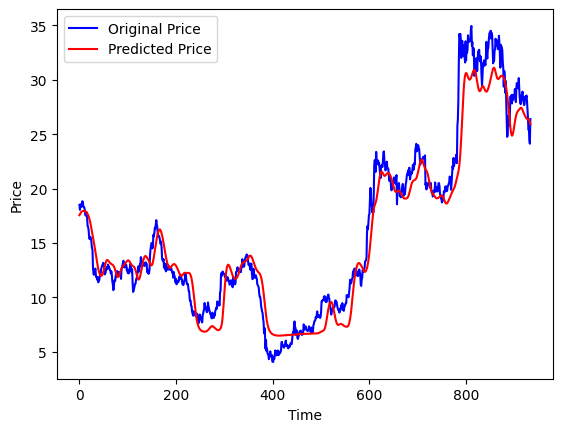

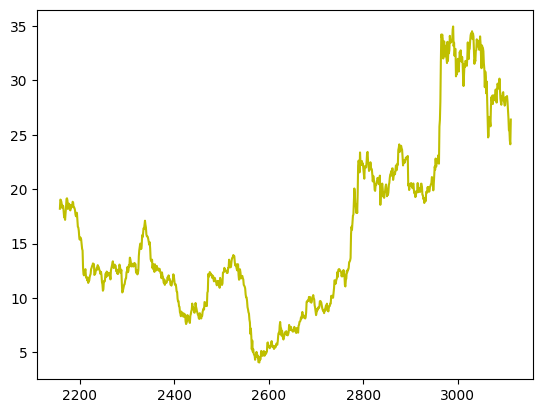

In [146]:
#plt.figure(figsize=(12,6))
#print(y_test)
plt.plot(y_test[0], 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
a=df.Close.shape[0]
#plt.plot(df.Close[a-934:a])

plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
plt.plot(df.Close[df.Close.shape[0]-955:df.Close.shape[0]],'y')
y_predicted.shape
#print(a)
b=[]
#for i in range (0,932):
    #print(a-932+i)
    #print(df.Close[a-932+i])

